In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Whole Sale Customer data

WSCdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\K-Means Clustering\Wholesale_Customers_data_V1.0.csv", header=0)

# Copy the file to back-up file

WSCdata_bk = WSCdata.copy()

# display first 5 records

WSCdata.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Display the dataset information

WSCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Check for missing values

WSCdata.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# Descriptive statitical analysis

WSCdata.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Dispaly the Correlation Coefficients of variables before scaling

WSCdata.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [7]:
# K-Means is a distance-based algorithm, this difference of magnitude of variable can create a problem. 
# So let’s first bring all the variables to the same magnitude by Standardizing of data

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

WSCdata_Scaled = SS.fit_transform(WSCdata)

# # Dispaly the Correlation Coefficients of variables after scaling

pd.DataFrame(WSCdata_Scaled).corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
1,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
2,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
3,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
4,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
5,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
6,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
7,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [8]:
# Defining the kmeans function with initialization as k-means++

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++')

# Fitting the k means algorithm on scaled data

kmeans.fit(WSCdata_Scaled)

# inertia on the fitted data

kmeans.inertia_

2599.38555935614

In [9]:
# Fitting multiple k-means algorithms and storing the values in an empty list ( use the elbow curve to determine the 
# optimum number of clusters in Python.)

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(WSCdata_Scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them

wcframe = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(wcframe['Cluster'], wcframe['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [11]:
# k means using 5 clusters and k-means++ initialization

kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')

# Fit the KMean algorithm

kmeans.fit(WSCdata_Scaled)

# Predict the cluster 

Pred = kmeans.predict(WSCdata_Scaled)

In [17]:
# Assign the label

WSCdata['Cluster_Id'] = kmeans.labels_
WSCdata.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_Id
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,3


In [18]:
Results = pd.DataFrame({'Cluster':Pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = WSCdata_bk.merge(Results, left_index=True, right_index=True)

# Display the 20 records randomly

ResultsFinal.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,3
5,2,3,9413,8259,5126,666,1795,1451,3
6,2,3,12126,3199,6975,480,3140,545,3
7,2,3,7579,4956,9426,1669,3321,2566,3
8,1,3,5963,3648,6192,425,1716,750,2
9,2,3,6006,11093,18881,1159,7425,2098,3


In [16]:
ResultsFinal['Cluster'].value_counts(sort=True)

2    209
3    126
0     91
1     12
4      2
Name: Cluster, dtype: int64

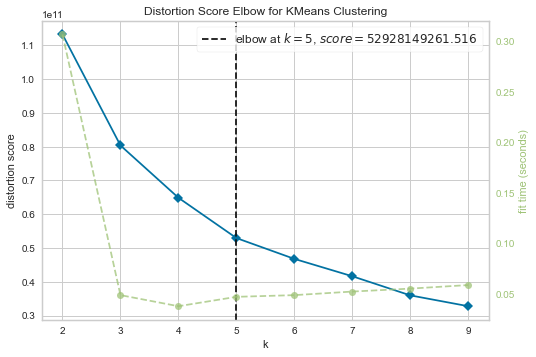

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer

# Identify the 2 independent variables

x = WSCdata_bk

# Instantiate the clustering model and visualizer

KM = KMeans(random_state=42)
visualizer = KElbowVisualizer(KM, k=(2,10))
 
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure